In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [68]:
data = pd.read_csv(r'dataset.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace = True)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),channel
0,1,Male,19,15,39,5
1,2,Male,21,15,81,3
2,3,Female,20,16,6,5
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


In [69]:
print("Data Points =",data.shape[0], "\nFeatures =", data.shape[1])

Data Points = 200 
Features = 6


In [70]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),channel
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,3.080000
std,57.879185,13.969007,26.264721,25.823522,1.481409
min,1.000000,18.000000,15.000000,1.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000,2.000000
50%,100.500000,36.000000,61.500000,50.000000,3.000000
75%,150.250000,49.000000,78.000000,73.000000,4.000000
max,200.000000,70.000000,137.000000,99.000000,5.000000


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
channel                   200 non-null int64
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


<h2> Histogram </h2>

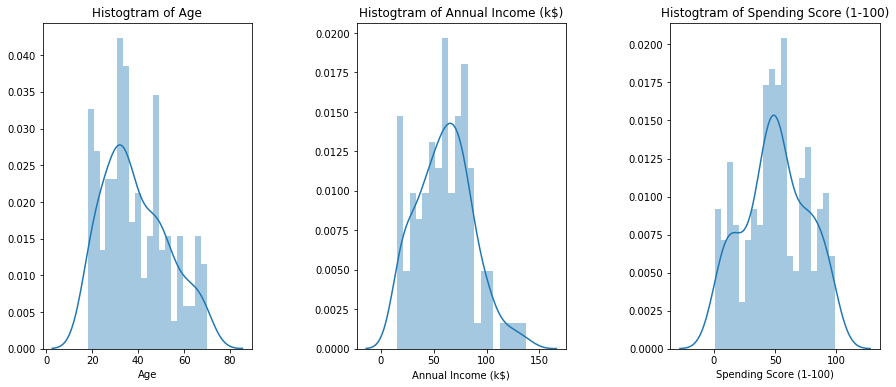

CPU times: user 656 ms, sys: 403 ms, total: 1.06 s
Wall time: 526 ms


In [72]:
%%time
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data[x] , bins = 20)
    plt.title('Histogtram of {}'.format(x))
plt.show()

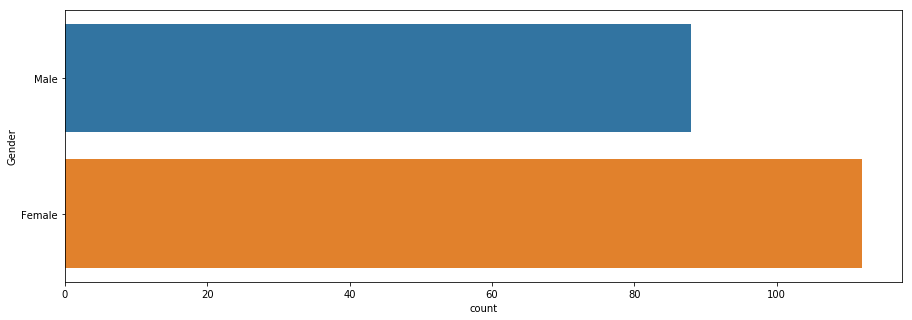

In [50]:
## count of customers by gender
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data)
plt.show()

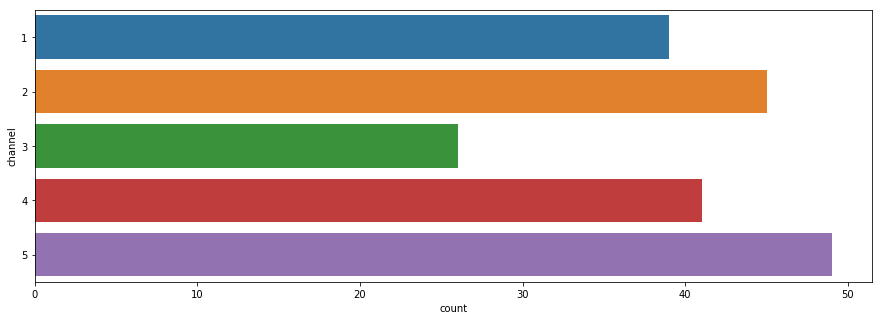

In [73]:
## count of customers by channel number
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'channel' , data = data)
plt.show()

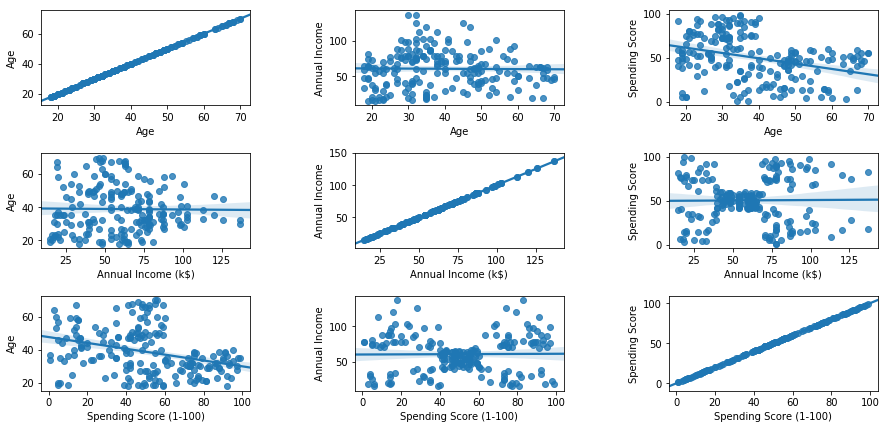

CPU times: user 2.73 s, sys: 1.72 s, total: 4.45 s
Wall time: 2 s


In [74]:
%%time
## scatter plot among different features
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

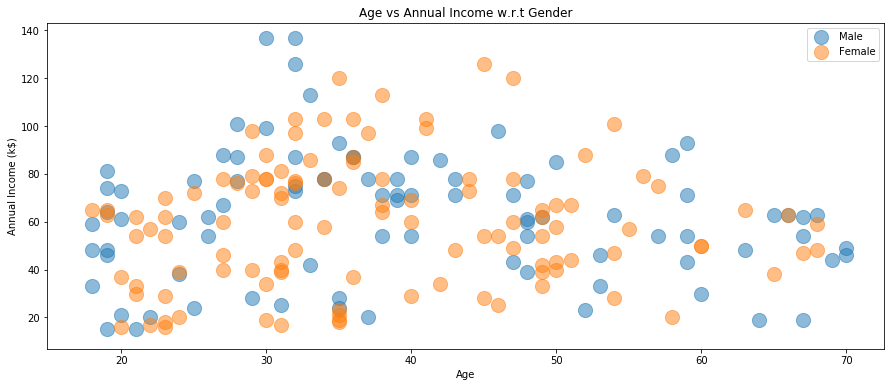

In [75]:
## age vs annual income and gender
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = data[data['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

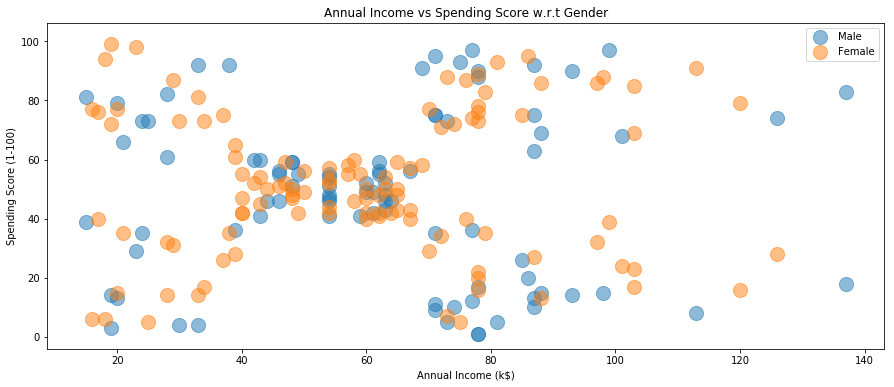

In [76]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

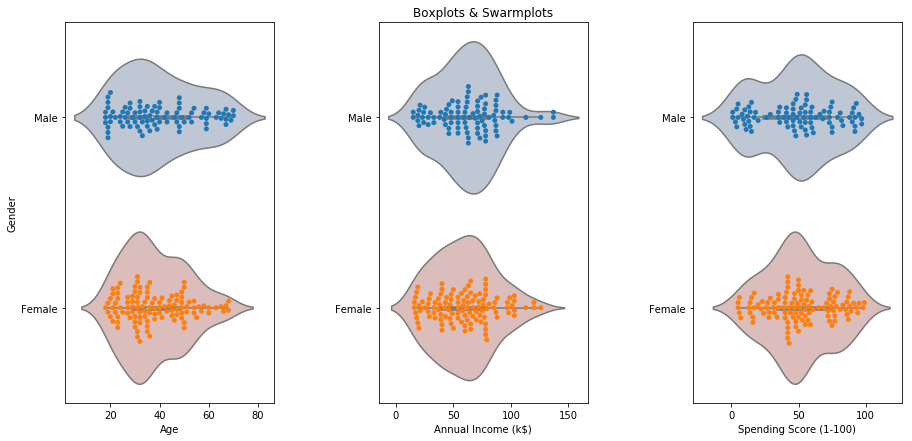

In [77]:
## Boxplots
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = data , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

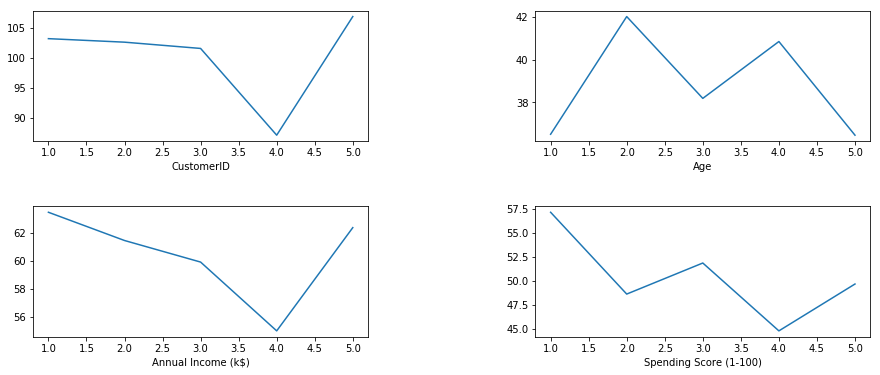

In [128]:
channels = data.groupby(['channel']).mean()
i = 0
plt.figure(1 , figsize = (15 , 6))
for col in channels.columns.values:
    i += 1
    plt.subplot(2, 2, i)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    plt.xlabel(col)
    plt.plot(channels[col])
plt.show()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
channel,,,,
1,103.256410,36.512821,63.487179,57.179487
2,102.666667,42.022222,61.466667,48.644444
3,101.615385,38.192308,59.923077,51.884615
4,87.073171,40.853659,55.000000,44.804878
5,106.959184,36.469388,62.387755,49.693878
